# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Puan Bening Pastika
- **Email:** puanbening04@students.unnes.ac.id
- **ID Dicoding:** blithening

## Menentukan Pertanyaan Bisnis

- Bagaimana rata-rata suhu tahunan di Stasiun Wanliu pada tahun 2013 hingga 2017?
- Bagaimana kadar polutan (PM2.5, PM10, SO2, NO2, O3) di Stasiun Wanliu dari tahun 2013 hingga 2017?
- Apakah terdapat hubungan antara  rata-rata suhu tahunan dengan kadar polutan di Stasiun Wanliu pada tahun 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [494]:
wanliu_df = pd.read_csv("/content/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [495]:
wanliu_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu
35063,35064,2017,2,28,23,7.0,25.0,6.0,86.0,700.0,11.0,7.0,1012.6,-11.2,0.0,NE,1.1,Wanliu


**Insight:**
- Menampilkan informasi detail dari dataset pada 5 baris awal dan 5 baris akhir
- Terdapat nilai NaN (missing values) pada dataset yang perlu ditangani

### Assessing Data

In [496]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [497]:
wanliu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


In [498]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [499]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


**Insight:**
- Terdapat nilai NaN (missing values) pada dataset yang perlu dibersihkan
- Dataset tidak mengandung data duplikat

### Cleaning Data

###Membersihkan missing values

In [500]:
wanliu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


In [501]:
wanliu_df_cleaned = wanliu_df.dropna()

In [502]:
wanliu_df_cleaned.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Missing values dihapuskan dari dataset
- Dataset yang telah bersih dari missing values ditampung pada kolom baru bernama wanliu_df_cleaned

## Exploratory Data Analysis (EDA)

### Explore Data Stasiun Wanliu

In [503]:
wanliu_df_cleaned.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
32879,32880,2016,11,29,23,159.0,208.0,39.0,108.0,4400.0,5.0,2.6,1023.9,-2.7,0.0,NE,0.7,Wanliu
21757,21758,2015,8,24,13,9.0,9.0,2.0,4.0,300.0,101.0,29.0,1005.4,15.2,0.0,E,1.6,Wanliu
17375,17376,2015,2,22,23,35.0,110.0,10.0,60.0,900.0,2.0,-5.0,1019.0,-13.8,0.0,E,0.6,Wanliu
11880,11881,2014,7,9,0,28.0,127.0,9.0,119.0,600.0,2.0,24.1,998.6,18.3,0.0,ENE,0.7,Wanliu
18881,18882,2015,4,26,17,107.0,202.0,50.0,34.0,1100.0,248.0,29.9,1000.4,10.4,0.0,SW,3.1,Wanliu


In [504]:
wanliu_df_cleaned.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634.000000,30634,30634.000000,30634
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanliu
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5811,NaN,30634
mean,18281.563067,2014.752954,6.459587,15.853627,11.716687,81.981459,108.765861,17.700088,64.429290,1293.450153,49.474836,14.020991,1010.748772,3.831086,0.074695,NaN,1.502971,NaN
std,10088.872293,1.160205,3.373101,8.864187,6.908334,80.976505,91.696002,21.655131,37.944554,1238.370788,55.772630,11.365609,10.410570,13.804524,0.951957,NaN,1.090126,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,NaN,0.000000,NaN
25%,10147.250000,2014.000000,3.000000,8.000000,6.000000,23.000000,40.000000,4.000000,35.000000,500.000000,4.000000,3.700000,1002.100000,-7.700000,0.000000,NaN,0.800000,NaN
50%,18933.500000,2015.000000,7.000000,16.000000,12.000000,57.000000,86.000000,10.000000,58.305200,900.000000,32.000000,15.300000,1010.000000,5.200000,0.000000,NaN,1.300000,NaN
75%,27013.750000,2016.000000,9.000000,24.000000,18.000000,114.000000,150.000000,22.000000,87.000000,1500.000000,74.000000,23.500000,1019.100000,16.500000,0.000000,NaN,2.000000,NaN


### Explore Data Suhu di Stasiun Wanliu

In [505]:
wanliu_df_cleaned.groupby(by="year").agg({
    'TEMP': ['mean', 'min', 'max', 'std']
})

TEMP                       
           mean   min   max        std
year                                  
2013  18.002907  -9.3  37.9   9.314570
2014  14.798024 -12.2  40.5  10.970978
2015  13.393680 -10.9  39.0  11.467160
2016  13.478110 -15.8  38.2  11.790479
2017   0.496514 -10.1  16.2   4.732221

In [506]:
temp_yearly = wanliu_df_cleaned.groupby('year').agg({'TEMP': 'mean'}).reset_index()
temp_yearly

,year,TEMP
0,2013,18.002907
1,2014,14.798024
2,2015,13.393680
3,2016,13.478110
4,2017,0.496514


### Explore Data Kadar Polutan di Stasiun Wanliu

In [507]:
wanliu_df_cleaned.groupby(by="year").agg({
    'PM2.5': ['mean', 'min', 'max', 'std']
})

PM2.5                        
           mean  min    max         std
year                                   
2013  89.917593  3.0  560.0   76.883974
2014  87.546054  3.0  567.0   81.685659
2015  80.620131  3.0  708.0   83.295030
2016  71.393692  3.0  770.0   73.930652
2017  91.388682  2.0  625.0  108.887790

In [508]:
wanliu_df_cleaned.groupby(by="year").agg({
    'PM10': ['mean', 'min', 'max', 'std']
})

PM10                        
            mean  min    max         std
year                                    
2013  109.046759  2.0  829.0   81.626858
2014  129.420364  3.0  923.0   98.848109
2015  104.998840  3.0  845.0   91.991932
2016   92.963425  3.0  893.0   82.414732
2017  107.669397  4.0  784.0  114.695369

In [509]:
wanliu_df_cleaned.groupby(by="year").agg({
    'SO2': ['mean', 'min', 'max', 'std']
})

SO2                          
           mean     min    max        std
year                                     
2013  23.505167  0.2856  172.0  23.085531
2014  23.333299  2.0000  187.0  27.435008
2015  15.110865  2.0000  131.0  18.271228
2016  10.647200  2.0000  204.0  13.977272
2017  20.422934  1.0000  147.0  19.264373

In [510]:
wanliu_df_cleaned.groupby(by="year").agg({
    'NO2': ['mean', 'min', 'max', 'std']
})

NO2                          
           mean     min    max        std
year                                     
2013  67.827048  5.1325  212.0  32.567704
2014  74.365418  4.0000  264.0  41.515568
2015  58.032749  2.0000  225.0  35.521113
2016  58.321741  2.0000  253.0  36.241739
2017  67.989576  2.0000  244.0  45.112542

In [511]:
wanliu_df_cleaned.groupby(by="year").agg({
    'CO': ['mean', 'min', 'max', 'std']
})

CO                             
             mean    min      max          std
year                                          
2013  1171.991111  100.0  10000.0   908.960097
2014  1286.847171  100.0   9600.0  1174.407417
2015  1369.106844  100.0  10000.0  1321.208644
2016  1235.795659  100.0  10000.0  1259.564749
2017  1741.027550  100.0  10000.0  1847.015836

In [512]:
wanliu_df_cleaned.groupby(by="year").agg({
    'O3': ['mean', 'min', 'max', 'std']
})

O3                          
           mean     min    max        std
year                                     
2013  51.398858  0.2142  344.0  54.198930
2014  42.871975  1.0000  342.0  51.374730
2015  52.528805  2.0000  364.0  62.942068
2016  53.728265  2.0000  318.0  55.971942
2017  35.998511  2.0000  102.0  29.620350

In [513]:
pollutant_yearly = wanliu_df_cleaned.groupby('year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'O3': 'mean'
}).reset_index()
pollutant_yearly

,year,PM2.5,PM10,SO2,NO2,O3
0,2013,89.917593,109.046759,23.505167,67.827048,51.398858
1,2014,87.546054,129.420364,23.333299,74.365418,42.871975
2,2015,80.620131,104.998840,15.110865,58.032749,52.528805
3,2016,71.393692,92.963425,10.647200,58.321741,53.728265
4,2017,91.388682,107.669397,20.422934,67.989576,35.998511


### Menggabungkan Data Suhu dan Kadar Polutan di Stasiun Wanliu

In [514]:
combined_data = pd.merge(pollutant_yearly, temp_yearly, on='year')
combined_data

,year,PM2.5,PM10,SO2,NO2,O3,TEMP
0,2013,89.917593,109.046759,23.505167,67.827048,51.398858,18.002907
1,2014,87.546054,129.420364,23.333299,74.365418,42.871975,14.798024
2,2015,80.620131,104.998840,15.110865,58.032749,52.528805,13.393680
3,2016,71.393692,92.963425,10.647200,58.321741,53.728265,13.478110
4,2017,91.388682,107.669397,20.422934,67.989576,35.998511,0.496514


In [515]:
correlation_data = combined_data.drop(columns=['year'])
correlation = correlation_data.corr()
correlation

,PM2.5,PM10,SO2,NO2,O3,TEMP
PM2.5,1.000000,0.642043,0.927723,0.774286,-0.689663,-0.283933
PM10,0.642043,1.000000,0.801742,0.873317,-0.496375,0.123092
SO2,0.927723,0.801742,1.000000,0.897457,-0.531971,0.033946
NO2,0.774286,0.873317,0.897457,1.000000,-0.667403,-0.057516
O3,-0.689663,-0.496375,-0.531971,-0.667403,1.000000,0.776107
TEMP,-0.283933,0.123092,0.033946,-0.057516,0.776107,1.000000


**Insight:**
- Mengetahui rata-rata dan variabilitas dari suhu dan polutan
- Mengetahui korelasi antara suhu dengan kadar polutan

## Visualization & Explanatory Analysis

### Bagaimana rata-rata suhu tahunan di Stasiun Wanliu pada tahun 2013 hingga 2017?

In [516]:
temp_yearly.rename(columns = {
    "year": "Tahun",
    "TEMP": "rata-rata suhu (°C)"
}, inplace=True)

temp_yearly['rata-rata suhu (°C)'] = temp_yearly['rata-rata suhu (°C)'].astype(float)
temp_yearly['rata-rata suhu (°C)'] = temp_yearly['rata-rata suhu (°C)'].apply(lambda x: f"{x:.1f}")

temp_yearly

,Tahun,rata-rata suhu (°C)
0,2013,18.0
1,2014,14.8
2,2015,13.4
3,2016,13.5
4,2017,0.5


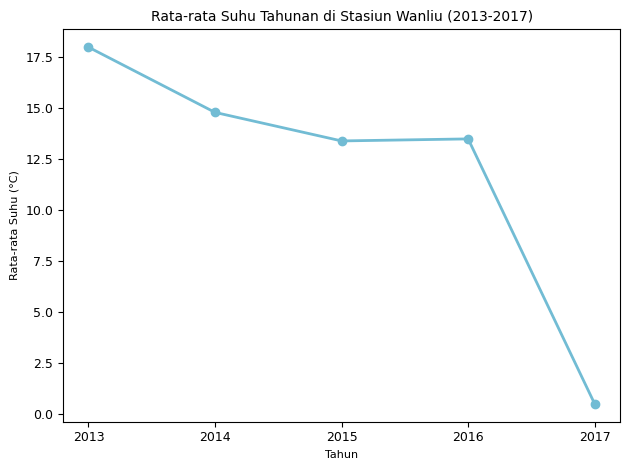

In [517]:
plt.plot(
    temp_yearly['Tahun'],
    temp_yearly['rata-rata suhu (°C)'].astype(float),
    marker='o',
    linewidth=2,
    color="#72BCD4"
)


plt.title("Rata-rata Suhu Tahunan di Stasiun Wanliu (2013-2017)", loc="center", fontsize=10)
plt.xlabel("Tahun", fontsize=8)
plt.ylabel("Rata-rata Suhu (°C)", fontsize=8)
plt.xticks(temp_yearly['Tahun'],fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()

plt.show()

#### Manual groupping

In [518]:
temp_yearly['rata-rata suhu (°C)'] = pd.to_numeric(temp_yearly['rata-rata suhu (°C)'], errors='coerce')

In [519]:
def clustering_temperature(temp):
    if temp < 15:
        return 'Rendah'
    elif 15 <= temp <= 25:
        return 'Sedang'
    else:
        return 'Tinggi'

In [520]:
temp_yearly['Kategori Suhu'] = temp_yearly['rata-rata suhu (°C)'].apply(clustering_temperature)

In [521]:
temp_yearly

,Tahun,rata-rata suhu (°C),Kategori Suhu
0,2013,18.0,Sedang
1,2014,14.8,Rendah
2,2015,13.4,Rendah
3,2016,13.5,Rendah
4,2017,0.5,Rendah


### Bagaimana kadar polutan (PM2.5, PM10, SO2, NO2, O3) di Stasiun Wanliu dari tahun 2013 hingga 2017?

In [522]:
pollutant_yearly.rename(columns = {
    "year": "Tahun",
}, inplace=True)

cols_to_format = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']

for col in cols_to_format:
    pollutant_yearly[col] = pollutant_yearly[col].astype(float)
    pollutant_yearly[col] = pollutant_yearly[col].apply(lambda x: f"{x:.2f}")

pollutant_yearly

,Tahun,PM2.5,PM10,SO2,NO2,O3
0,2013,89.92,109.05,23.51,67.83,51.40
1,2014,87.55,129.42,23.33,74.37,42.87
2,2015,80.62,105.00,15.11,58.03,52.53
3,2016,71.39,92.96,10.65,58.32,53.73
4,2017,91.39,107.67,20.42,67.99,36.00


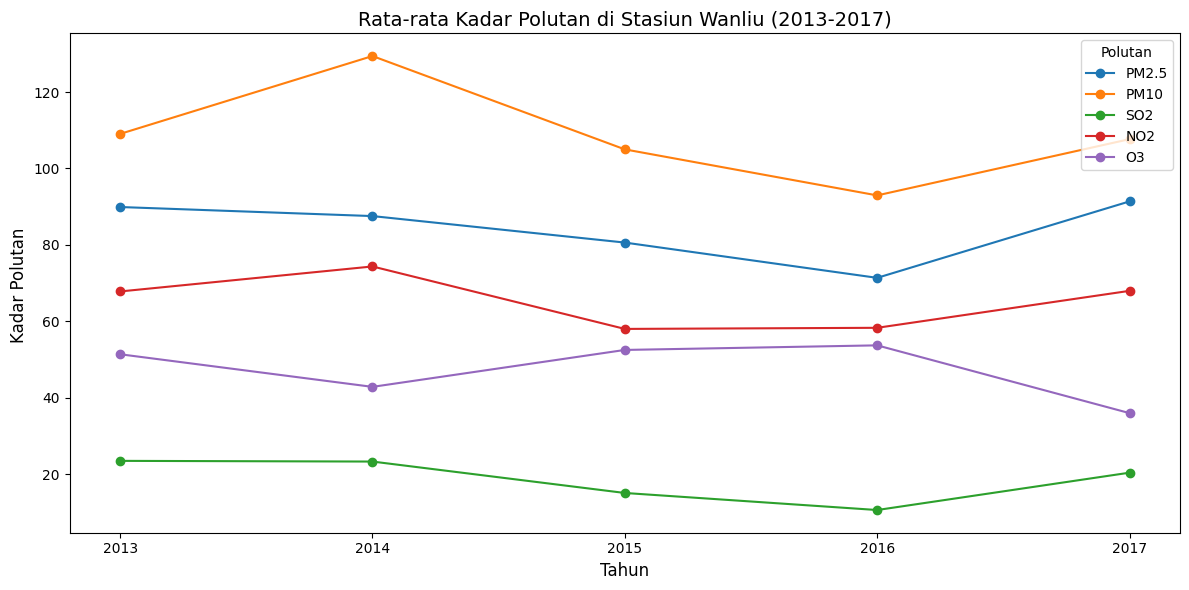

In [523]:
plt.figure(figsize=(12, 6))

for col in cols_to_format:
    plt.plot(
    pollutant_yearly['Tahun'],
    pollutant_yearly[col].astype(float),
    marker='o',
    label=col)

plt.title("Rata-rata Kadar Polutan di Stasiun Wanliu (2013-2017)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Kadar Polutan ", fontsize=12)

plt.legend(title="Polutan", fontsize=10)
plt.xticks(pollutant_yearly['Tahun'], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

### Apakah terdapat hubungan antara  rata-rata suhu tahunan dengan kadar polutan di Stasiun Wanliu pada tahun 2013 hingga 2017?

In [524]:
cols_to_format = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP']

for col in cols_to_format:
    correlation[col] = correlation[col].astype(float)
    correlation[col] = correlation[col].apply(lambda x: f"{x:.2f}")

correlation

,PM2.5,PM10,SO2,NO2,O3,TEMP
PM2.5,1.00,0.64,0.93,0.77,-0.69,-0.28
PM10,0.64,1.00,0.80,0.87,-0.50,0.12
SO2,0.93,0.80,1.00,0.90,-0.53,0.03
NO2,0.77,0.87,0.90,1.00,-0.67,-0.06
O3,-0.69,-0.50,-0.53,-0.67,1.00,0.78
TEMP,-0.28,0.12,0.03,-0.06,0.78,1.00


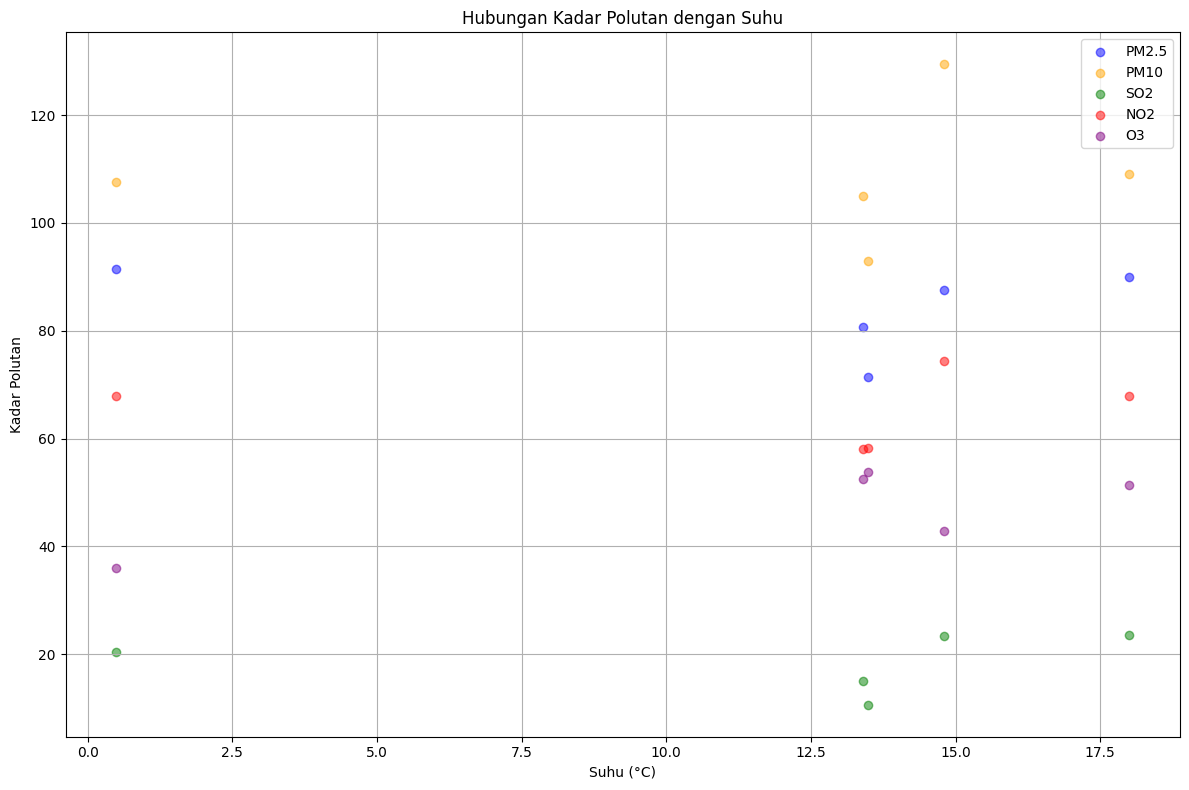

In [525]:
plt.figure(figsize=(12, 8))

colors = ['blue', 'orange', 'green', 'red', 'purple']
labels = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']

for col, color, label in zip(cols_to_format[:-1], colors, labels):
    plt.scatter(combined_data['TEMP'], combined_data[col], color=color, alpha=0.5, label=label)

plt.title('Hubungan Kadar Polutan dengan Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Kadar Polutan')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Insight:**
- Grafik garis menunjukkan perubahan rata-rata suhu tahunan dari tahun 2013 hingga 2017
- Fungsi clustering_temperature berguna untuk mengelompokkan rata-rata suhu tahunan ke dalam kategori 'Rendah', 'Sedang', dan 'Tinggi'
- Grafik garis untuk kadar polutan memungkinkan perbandingan antar jenis polutan dari tahun ke tahun
- Scatter plot berguna untuk menganalisis hubungan antara suhu dan kadar polutan

## Conclusion

1. Suhu di Stasiun Wanliu menunjukkan tren penurunan setiap tahun, dengan penurunan yang signifikan terjadi pada tahun 2017
2. Kadar polutan di Stasiun Wanliu menunjukkan pola fluktuatif yang bervariasi setiap tahunnya
3. Terdapat hubungan yang lemah antara suhu dengan kadar polutan